# Cyfrowe przetwarzanie sygnałów i obrazów - Laboratorium 1 
##### Joanna Orzeł, 259064 <br>Tomasz Michalski, 254040

###### Zaimportowanie bibliotek potrzebnych podczas realizacji ćwiczenia

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy import signal


### Ćwiczenie 1. 
Napisz skrypt w Pythonie/Matlabie umożliwiający wczytywanie i wizualizację badanych sygnałów. Program powinien umożliwiać obserwowanie wycinka sygnału dla zadanego przedziału czasowego, skalowanie osi wykresów i ich opis oraz zapis dowolnego wycinka sygnału do pliku o podanej nazwie

#### ekg1.txt
12 kolumn odpowiadających odprowadzeniom
fs = 1000 Hz

Początkowo dane zostały odczytane z pliku tekstowego "ekg1.txt" za pomocą komendy ```pd.read_csv``` i zapisane do zmiennej ```ekg1```. Następnie została ustawiona częstotliwość, czas trwania (obliczony za pomocą wzoru ```t=f/T```) oraz stworzona kolumna dotycząca sygnału dla wybranej próbki. Dla pokazania wyników zostało wyśiwetlone 5 pierwszych rekordów za pomocą funkcji ```ekg1.head()```  

In [8]:
ekg1 = pd.read_csv('ekg1.txt', 
                  names = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12'], 
                  sep= ' ') 
fs_ekg1 = 1000 # częstotliwość
t_ekg1 = (ekg1.shape[0] - 1) / fs_ekg1 # czas
ekg1['t'] = ekg1.index/fs_ekg1
ekg1 = ekg1.set_index('t')
ekg1.head()

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12
t,,,,,,,,,,,,
0.000,106,335,228,-227,-59,291,-392,-45,443,372,908,395
0.001,106,335,228,-227,-59,291,-392,-45,443,372,908,395
0.002,106,325,219,-219,-60,284,492,837,239,372,908,405
0.003,86,306,219,-214,-55,274,487,832,240,404,179,-63
0.004,96,320,224,-195,-65,264,492,842,244,404,174,-62


Następnie stworzone zostały wykresy wizualizujące zmiany wartości próbki sygnału w czasie dla kolejnych odprowadzeń.

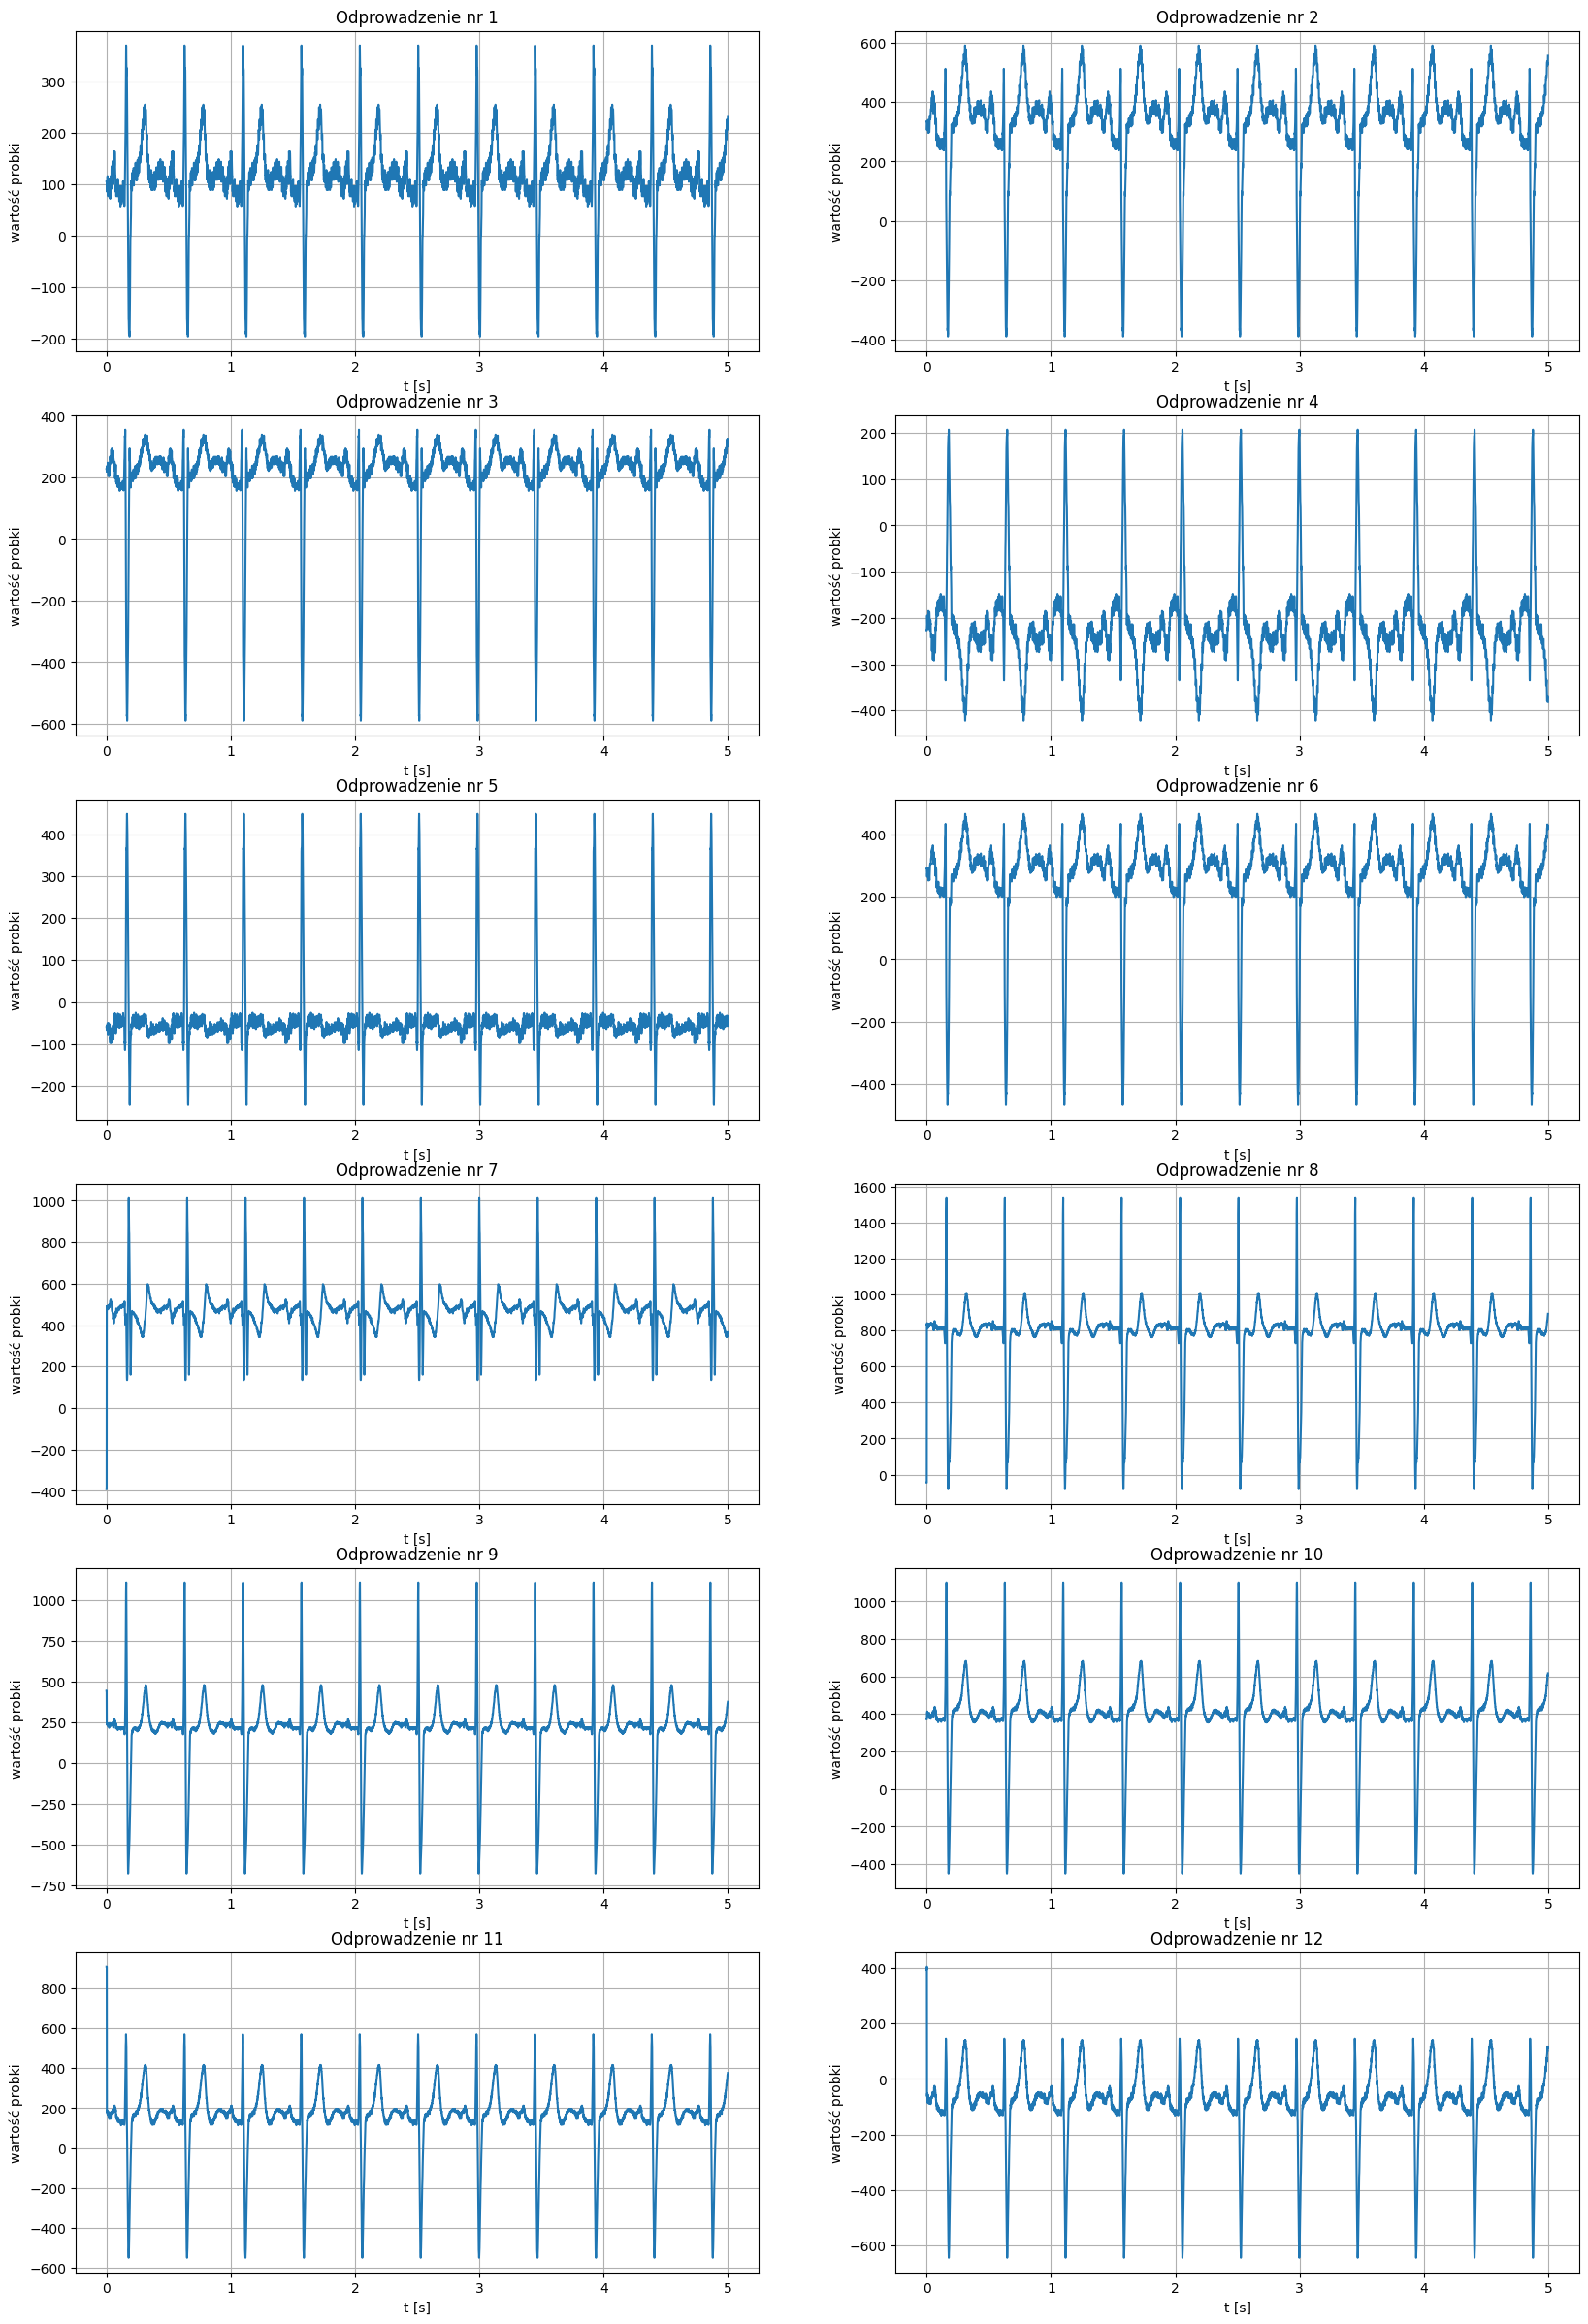

In [16]:
plt.figure(figsize=(20,30))
for i in range(1, 13):
    x = ekg1.index    
    y = ekg1[f'k{i}'] 

    plt.subplot(6, 2, i)  #dodanie osi
    plt.plot(x, y)        
    plt.grid(axis='both') # dodanie siatki 
    plt.xlabel('t [s]') 
    plt.ylabel('wartość probki')
    plt.title(f'Odprowadzenie nr {i}')

### ekg100.txt
1 kolumna
fs = 360 Hz

Analogicznie dla pliku ```ekg100.txt``` oraz ```ekg_noise.txt```
zostały ustawione parametry częstotliwości i czasu trwania sygnału oraz wyświetlone w tabeli.

In [21]:
ekg100 = pd.read_csv('ekg100.txt', names=['column']) 
fs_ekg100 = 360 # częstotliwość
t_ekg100 = (ekg100.shape[0] - 1) / fs_ekg1 # czas
ekg100['t'] = ekg100.index/fs_ekg100
ekg100 = ekg100.set_index('t')
ekg100.head()

,column
t,
0.000000,-0.145
0.002778,-0.145
0.005556,-0.145
0.008333,-0.145
0.011111,-0.145


Text(0, 0.5, 'wartość probki')

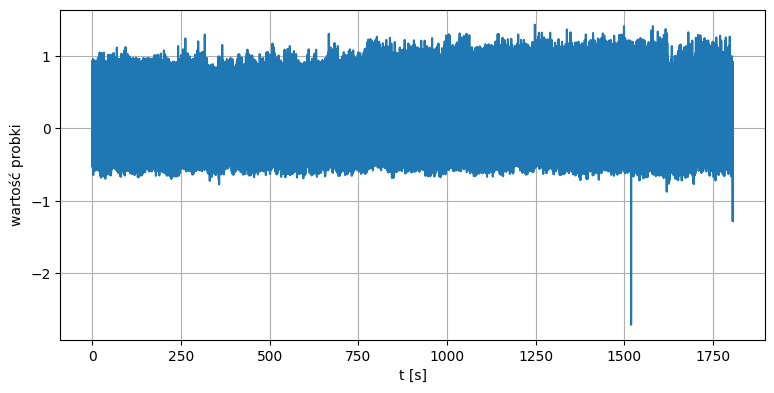

In [27]:
plt.figure(figsize=(20,30))


plt.subplot(6, 2, i)  #dodanie osi
plt.plot(ekg100)        
plt.grid(axis='both') # dodanie siatki 
plt.xlabel('t [s]') 
plt.ylabel('wartość probki')


### ekg_noise.txt 
1 kolumna: czas 
2 kolumna: wartości amplitud EKG 
fs = 360 Hz

In [4]:
ekg_noise = pd.read_csv('ekg_noise.txt', names = ['t', 'amplituda'], sep = '\s+', index_col = 0)
fs_ekg_noise = 360 # częstotliwość
t_ekg_noise = (ekg_noise.shape[0] - 1) / fs_ekg_noise # czas
ekg_noise.head()

,amplituda
t,
0.000000,-0.325000
0.002778,-0.273038
0.005556,-0.268038
0.008333,-0.320000
0.011111,-0.391962


Text(0, 0.5, 'wartość aplitudy')

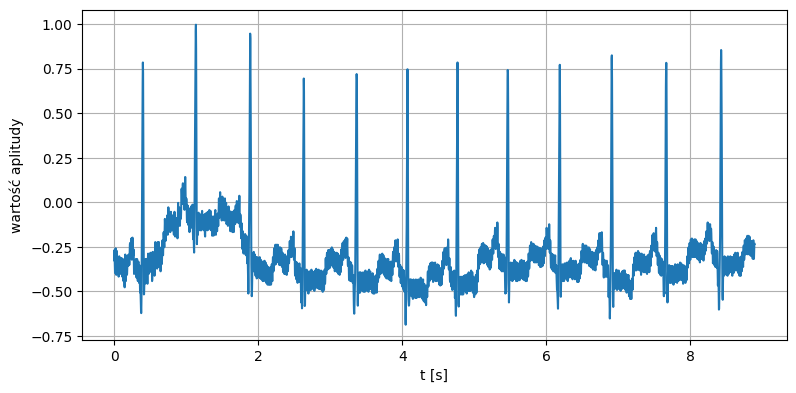

In [28]:
plt.figure(figsize=(20,30))


plt.subplot(6, 2, i)  #dodanie osi
plt.plot(ekg_noise)        
plt.grid(axis='both') # dodanie siatki 
plt.xlabel('t [s]') 
plt.ylabel('wartość aplitudy')

### Ćwiczenie 2
Celem ćwiczenia jest praktyczne wypróbowanie funkcji ```numpy.fft```
i ```numpy.ifft``` do wyznaczania prostej i odwrotnej transformaty Fouriera [1, 3].

#### 1)
Wygenerowanie ciagu próbek odpowiadających fali sinusoidalnej o częstotliwości 50 Hz i długości 65536

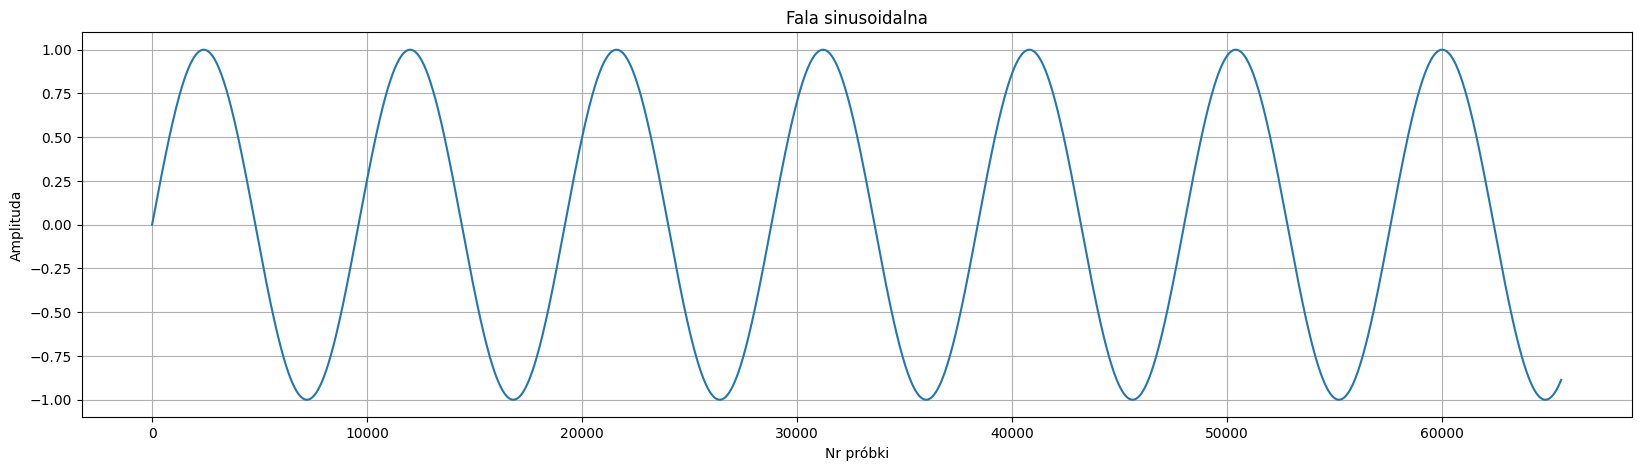

In [30]:
length = 65536  # długość fali
f = 50          # częstotliwość
fs = 480000     # częstotliwość próbkowania

x = np.arange(length)                 # równomierne rozłożenie próbek dla długości 65536
y = np.sin(2 * np.pi * x * f / fs)    # obliczenie wartości sinusa dla danej próbki x, pulsacja n-tej próbki będzie równa n * delta fi, delta fi = 2 pi f / fs

plt.figure(figsize=(20,5))    
plt.plot(x, y)                 
plt.xlabel('Nr próbki')        
plt.ylabel('Amplituda')       
plt.title('Fala sinusoidalna') 
plt.grid(True, which='both')   

x = plt.show()

#### 2) 
Wyznaczenie dyskretnej transformaty Fouriera sygnału i przedstawienie jego widma amplitudowego na wykresie w zakresie częstotliwości [0, fs/2], gdzie fs oznacza częstotliwość próbkowania.

Wyznaczenie dyskretnej transformaty Fouriera zostało wykonane za pomocą funkcji ```np.fft.rfft``` pozwalającej na wyświetlenie prązka bez sprzężenia zespolonego. Dodatkowo widmo zostało zeskalowane poprzez podzielenie przez połowę długości w celu reprezentacji wartości widmowej energii poszczególnych składowaych.

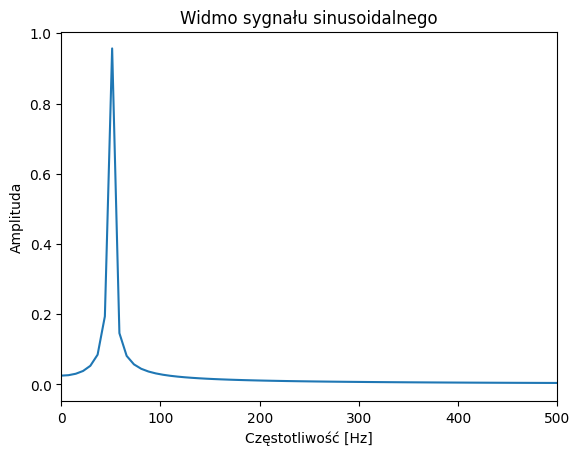

In [33]:
spectrum = np.abs(np.fft.rfft(y)) / (length / 2) 
T = 1/fs
f = np.fft.rfftfreq(length, T) # częstotliwość dyskretnej transformaty fouriera

plt.plot(figsize=(20, 5))         
plt.plot(f, spectrum)
plt.xlim(0, 500)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo sygnału sinusoidalnego')

plt.show()

#### 3)
Wygenerowanie ciągu próbek mieszaniny dwóch fal sinusoidalnych (tzn. ich kombinacji liniowej) o częstotliwościach 50 i 60 Hz oraz wyznaczenie transformaty analogicznie jak w punkcie 2

W celu możliwości wwielokrotego wyświetlania fal sinusoidalnych oraz widma fal kod został zdefiniowany jako funkcja ```spectrum_2```, kttórej parametrami są częstotliwości dwóch fal oraz długość sygnału.

In [34]:
def spectrum_2(f1, f2, fs):
    length = 65536                            # długość sygnału
    x = np.arange(length)                     # równomierne rozłożenie próbek dla długości 65536
    y1 = np.sin(2 * np.pi * x * f1 / fs )     # obliczenie wartości dla każdej próbki 
    y2 = np.sin(2 * np.pi * x * f2 / fs )
    y = y1 + y2                               # zsumowanie dwóch sygałów
    spectrum2 = np.fft.rfft(y)                # obliczenie transformaty dla dwóch fal 

    plt.figure(figsize = (25, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, y)
    plt.title('Kombinacja liniowa fal sinusoidalnych')
    plt.xlabel('Częstotliwść [Hz]')
    plt.ylabel('Amplituda')

    plt.subplot(1, 2, 2)
    plt.plot(f, np.abs(spectrum2) / (length/2))
    plt.xlim(0, 2000)
    plt.title('Widmo fal sinusiodalnych')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Wartość')

    plt.show()

Następnie funkcja została wywołana z parametrami podanymi w treści zadania- 50 Hz oraz 60 Hz

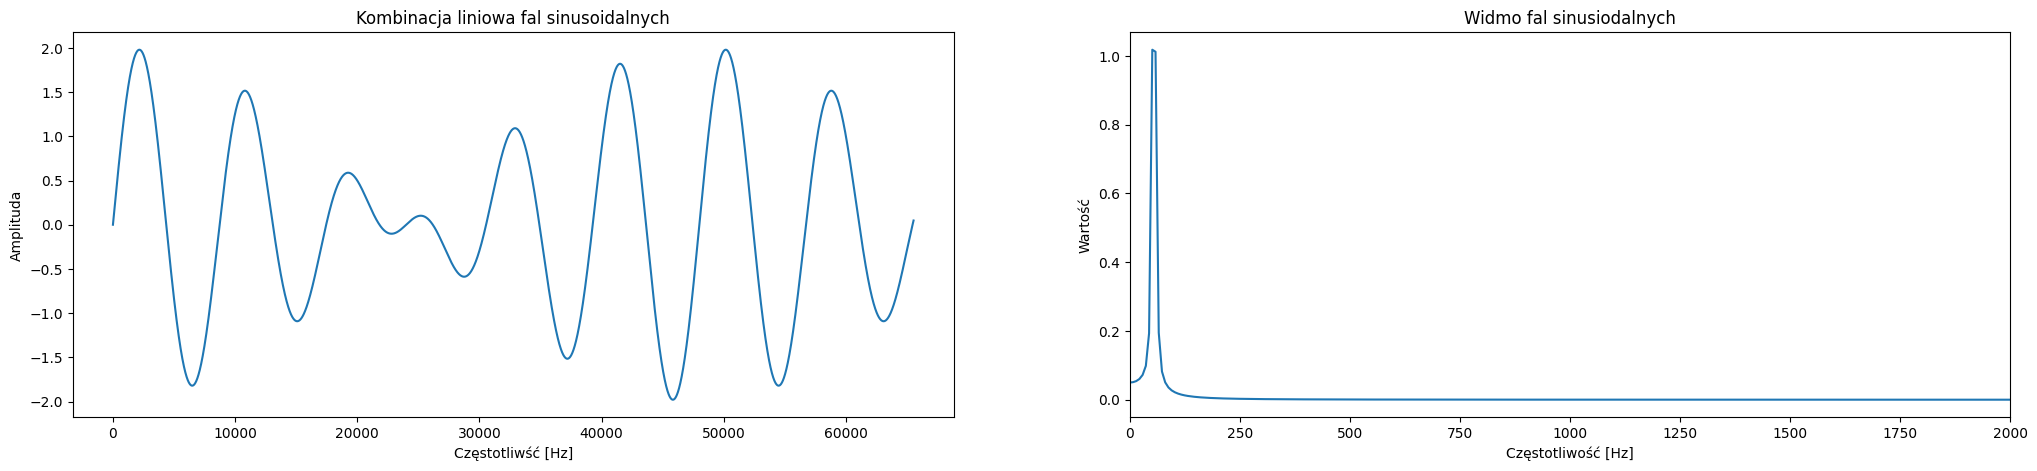

In [35]:
spectrum_2(50, 60, 480000)

#### 4)
Powtórzenie eksperyment dla innych częstotliwości próbkowania

W cel przeprowadzenia eksperymentu została wybrana dwa razy wiesza oraz dwa razy mniejsza częstotliwość próbkowania.

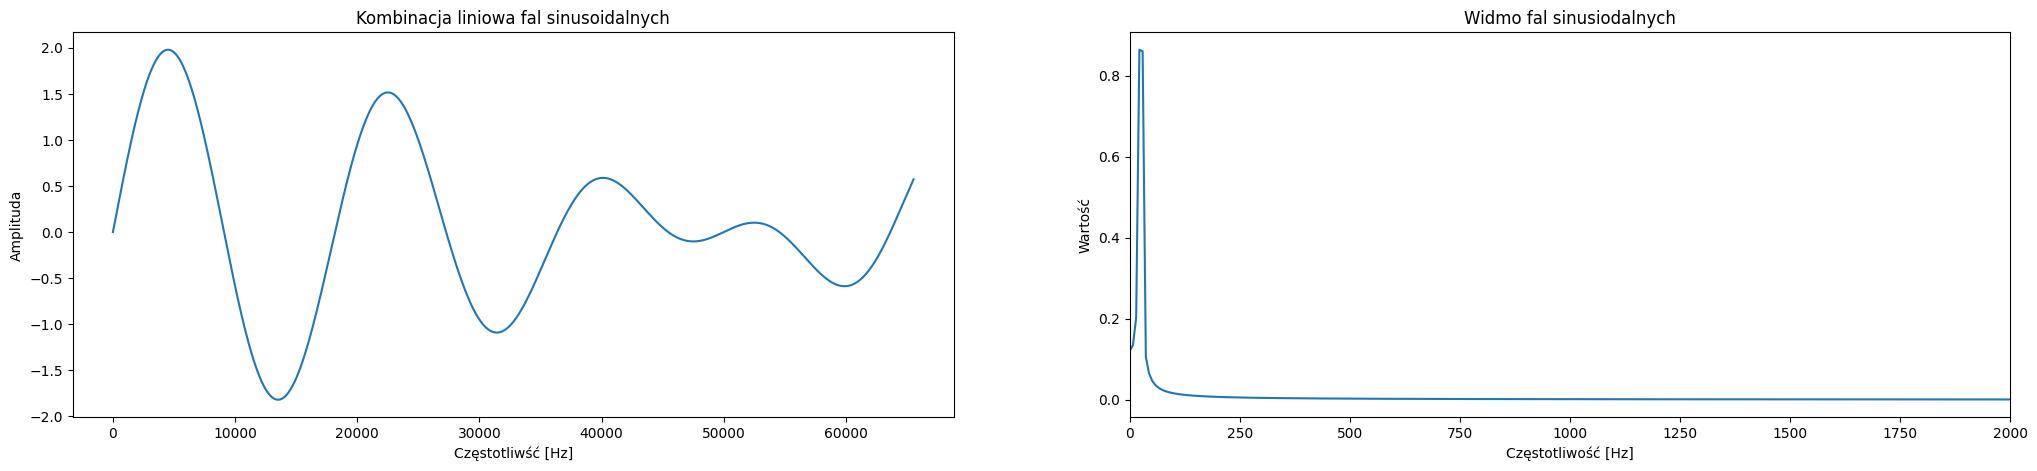

In [38]:
spectrum_2(50, 60, 1000000)

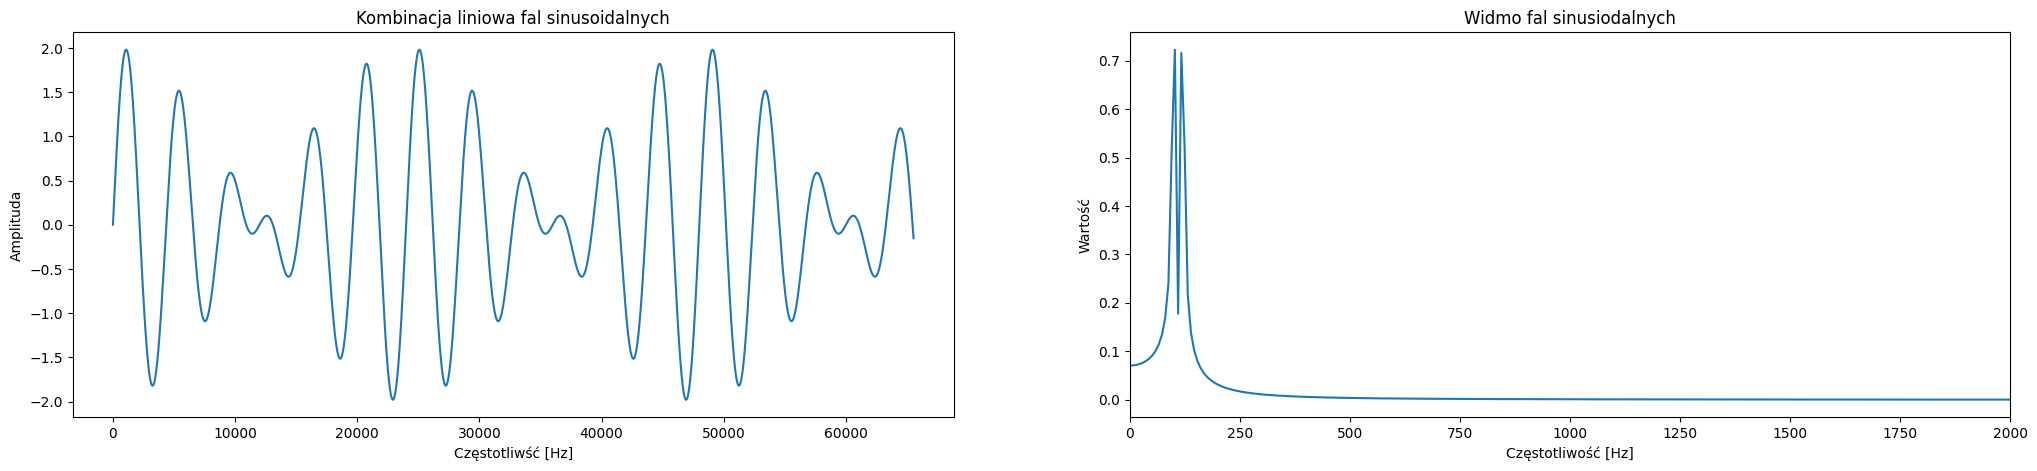

In [39]:
spectrum_2(50, 60, 240000)

#### 5)
Wyznaczenie odwrotnej transformaty Fouriera ciągów oraz porównanie z ciągami oryginalnymi

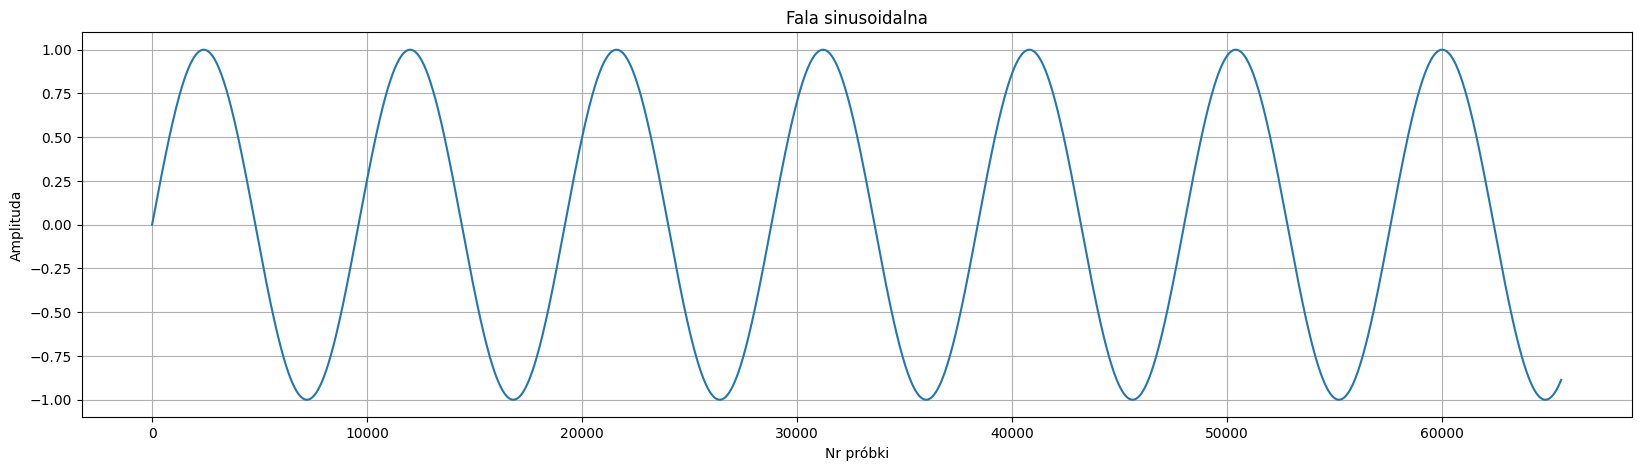

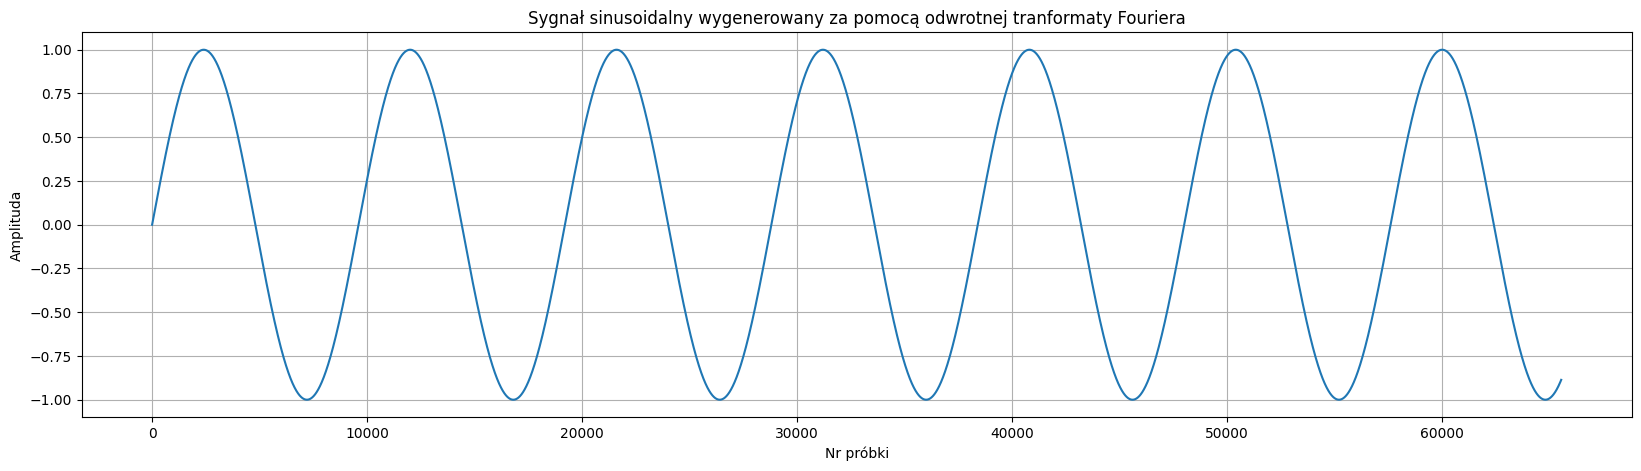

In [41]:
length = 65536  # długość fali
f = 50          # częstotliwość
fs = 480000     # częstotliwość próbkowania

x = np.arange(length)                 # równomierne rozłożenie próbek dla długości 65536
y = np.sin(2 * np.pi * x * f / fs)    # obliczenie wartości sinuda dla danej próbki x, pulsacja n-tej próbki będzie równa n * delta fi, delta fi = 2 pi f / fs

plt.figure(figsize=(20,5))    
plt.plot(x, y)                 
plt.xlabel('Nr próbki')         
plt.ylabel('Amplituda')
plt.title('Fala sinusoidalna')
plt.grid(True, which='both')   

x = plt.show()



y_spectrum = np.fft.rfft(y)            # wygenerowanie widma fali sinusoidalnej
plot = np.real(np.fft.irfft(y_spectrum))

plt.figure(figsize=(20, 5))
plt.plot(plot)
plt.title('Sygnał sinusoidalny wygenerowany za pomocą odwrotnej tranformaty Fouriera')
plt.xlabel('Nr próbki')
plt.ylabel('Amplituda')
plt.grid(True, which='both')

plt.show()

### Ćwiczenie 3
Celem ćwiczenia jest obserwacja widma sygnału EKG

#### 1)
Wczytanie sygnału ```ecg100.txt``` oraz przedstawienie go na wykresie

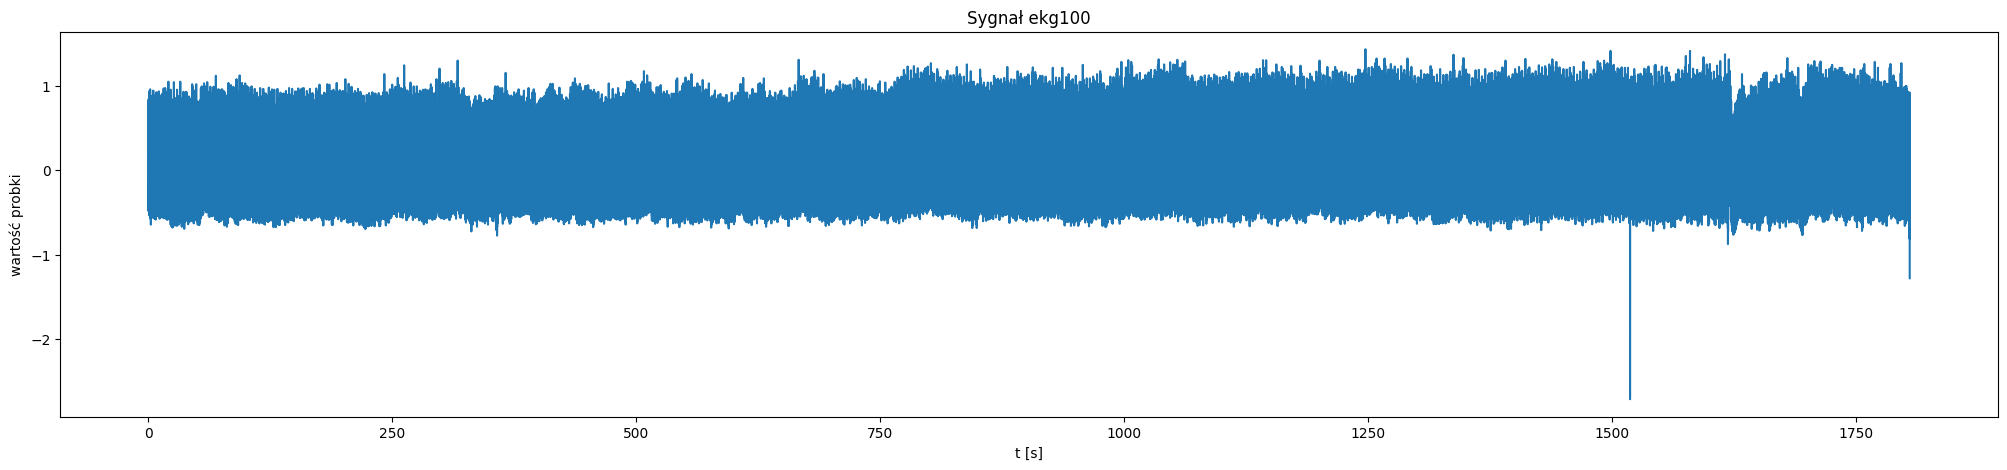

In [43]:
ekg100 = pd.read_csv('ekg100.txt', names=['column']) 
fs_ekg100 = 360 # częstotliwość
n=3600
t_ekg100 = (ekg100.shape[0] - 1) / fs_ekg1 # czas
ekg100['t'] = ekg100.index/fs_ekg100
ekg100 = ekg100.set_index('t')

plt.figure(figsize=(25,5))
plt.plot(ekg100)        
plt.title('Sygnał ekg100')
plt.xlabel('t [s]') 
plt.ylabel('wartość probki')
plt.show()

#### 2)
Wyznaczyenie dyskretnej transformaty Fouriera i przedstawienie widma amplitudowego sygnału w funkcji częstotliwości w zakresie [0, fs/2], gdzie fs oznacza częstotliwość próbkowania

#### 3)
Wyznaczenie odwrotnej dyskretnej transformaty Fouriera ciągu wyznaczonego w
punkcie 2 i porównanie otrzymanego ciągu próbek z pierwotnym sygnałem ecg100
(można wyznaczyć różnicę sygnałów)